# Practice PS07: Outlier analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [ ]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

<font size="+1" color="red">Replace this cell with your code to print the number and percentages of patients in each group.</font>

In [ ]:
total_patients = len(df)

# Calculate the number of patients with a normal and abnormal thyroid
normal_patients = df[df['result'] == 'normal'].shape[0]
abnormal_patients = df[df['result'] == 'abnormal'].shape[0]

# Calculate the percentage of patients with a normal and abnormal thyroid
normal_percentage = (normal_patients / total_patients) * 100
abnormal_percentage = (abnormal_patients / total_patients) * 100

# Print the results
print(f"Total patients   : {total_patients}")
print(f"Normal thyroid   : {normal_patients} ({normal_percentage:.2f}%)")
print(f"Abnormal thyroid : {abnormal_patients} ({abnormal_percentage:.2f}%)")

Total patients   : 7200
Normal thyroid   : 6666 (92.58%)
Abnormal thyroid : 534 (7.42%)


<font size="+1" color="red">Replace this cell with your code to print the 10 normal exams and the centroid of all normal exams, and the first 10 abnormal exams and the centroid of all abnormal exams.</font>

In [ ]:
# Print the first 10 normal exams
normal_exams = df[df['result'] == 'normal']
print("First 10 normal exams:")
display(normal_exams.head(10))

# Calculate and print the centroid (average) of a normal exam
normal_centroid = df[df['result'] == 'normal'].iloc[:, :-1].mean()
normal_centroid.rename('Centroid of normal exams', inplace=True)
print("\nCentroid (average) of normal exams:")
display(normal_centroid)

# Print the first 10 abnormal exams
abnormal_exams = df[df['result'] == 'abnormal']
print("\nFirst 10 abnormal exams:")
display(abnormal_exams.head(10))

# Calculate and print the centroid (average) of an abnormal exam
abnormal_centroid = df[df['result'] == 'abnormal'].iloc[:, :-1].mean()
abnormal_centroid.rename('Centroid of abnormal exams', inplace=True)
print("\nCentroid (average) of abnormal exams:")
display(abnormal_centroid)

First 10 normal exams:


,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.015,0.120,0.082,0.146,normal
1,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,0.47,0.00190,0.024,0.102,0.131,0.078,normal
3,0.64,0.00090,0.017,0.077,0.090,0.085,normal
4,0.23,0.00025,0.026,0.139,0.090,0.153,normal
5,0.69,0.00025,0.016,0.086,0.070,0.123,normal
6,0.85,0.00025,0.023,0.128,0.104,0.121,normal
7,0.48,0.00208,0.020,0.086,0.078,0.110,normal
8,0.67,0.00130,0.024,0.087,0.109,0.080,normal
9,0.76,0.00010,0.029,0.124,0.128,0.097,normal



Centroid (average) of normal exams:


,Centroid of normal exams
f1,0.518314
f2,0.002098
f3,0.020384
f4,0.112193
f5,0.097705
f6,0.116132



First 10 abnormal exams:


,f1,f2,f3,f4,f5,f6,result
10,0.62,0.01100,0.0080,0.0730,0.074,0.0980,abnormal
19,0.50,0.06100,0.0096,0.0130,0.116,0.0110,abnormal
27,0.78,0.02500,0.0090,0.0500,0.084,0.0600,abnormal
43,0.61,0.00979,0.0040,0.0810,0.064,0.1260,abnormal
84,0.56,0.00820,0.0200,0.0660,0.094,0.0700,abnormal
105,0.73,0.04700,0.0110,0.0520,0.090,0.0580,abnormal
115,0.43,0.07000,0.0050,0.0029,0.104,0.0028,abnormal
116,0.42,0.03100,0.0080,0.0130,0.119,0.0110,abnormal
145,0.78,0.00630,0.0110,0.0560,0.086,0.0650,abnormal
147,0.53,0.02500,0.0040,0.0390,0.061,0.0640,abnormal



Centroid (average) of abnormal exams:


,Centroid of abnormal exams
f1,0.548034
f2,0.039363
f3,0.014891
f4,0.074940
f5,0.099500
f6,0.076803


<font size="+1" color="red">Replace this cell with a brief comment indicating, based only on the centroids, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>

If we calculate `(abnormal_centroid-normal_centroid)/normal_centroid*100`, we will see the percentatge of difference between normal exams and abnormal exams.
Therefore, We can see some differences between centroid of abnormal exams and normal exams:
- **f1, f5**: In this case, there is not huge difference between normal and abnormal exams. f1 abnormal exams is 5.73 times bigger than f1 normal exams. f5 abnormal exams is 1.83 times bigger than f5.
- **f3, f4, f6**: In this case, there is a slightly difference between normal and abnormal exams. f3 normal exams is 26.94 times bigger than f3 abnormal exams. f4 normal exams is 33.204 times bigger than f4 abnormal exams. f6 normal exams is 33.86 times bigger than f6 abnormal exams.

- **f2**: In this case there is a huge difference about f2 exams. f2 abnormal exams is 1776.59 times bigger than normal exams.

Taking into account these differences, f2 mean is easy to detect the abnormal and normal exams. In the case of f3, f4, f6 will be easy because we see a slightly decreasing mean.
In the case of f1 and f6, will be worse to detect the difference between abnormal exams and normal exams.


<font size="+1" color="red">Replace this cell with your code to create a scatter matrix as described above.</font>

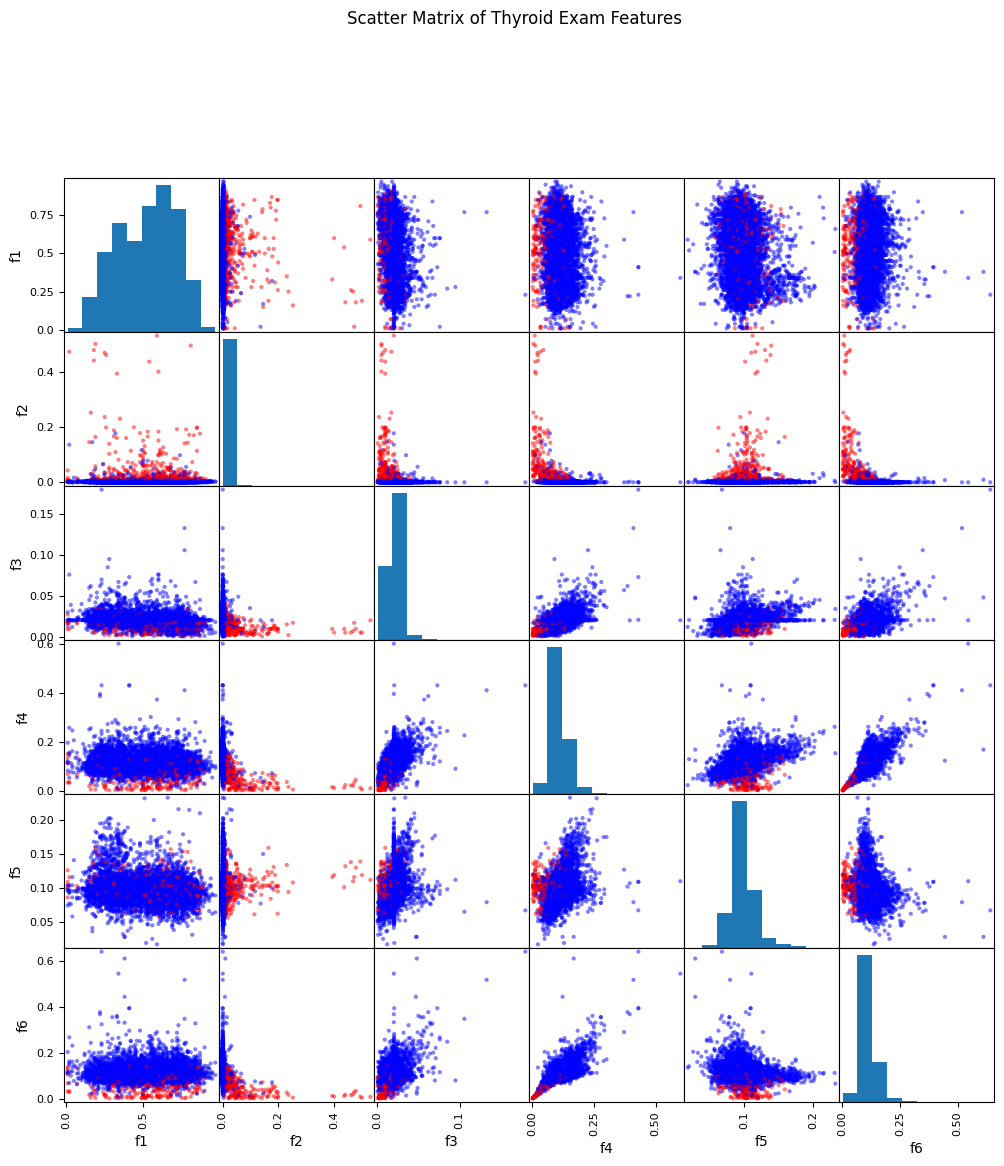

In [ ]:
# Define colors for normal and abnormal exams
color_code = {'abnormal': 'red', 'normal': 'blue'}
colors = df['result'].apply(lambda x: color_code[x])

# Create scatter matrix
pd.plotting.scatter_matrix(df.iloc[:, :-1], c=colors, figsize=(12, 12))

# Show plot
plt.suptitle("Scatter Matrix of Thyroid Exam Features", y=1.02)
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

- **f1:** Normal cases (blue) are more spread out, while abnormal cases (red) are grouped in lower values.
- **f2:** Abnormal cases are concentrated near 0, while normal cases show more variation.
- **f3:** Similar to f2, abnormal cases cluster at low values, clearly separated from normal cases.
- **f4:** Normal cases are more spread out, while abnormal ones group at lower values, though with some overlap.
- **f5:** There is good separation, with abnormal cases clustered at low values and normal cases covering a wider range.
- **f6:** Abnormal cases mainly occupy low values, while normal cases are distributed in higher ranges.

In summary, f2, f3, and f5 seem to be the most useful for distinguishing between normal and abnormal exams due to clearer separation in their values.

# 1. Create isolation tree

## 1.1. Random dimension and random split

<font size="+1" color="red">Replace this cell with code implementing "pick_random_dimension" and a couple of calls to this function.</font>

In [ ]:
def pick_random_dimension(df, columns_to_ignore):
    # Filter out columns to ignore
    valid_columns = [col for col in df.columns if col not in columns_to_ignore]
    return random.choice(valid_columns)

In [ ]:
columns_to_ignore = ['result']
print(pick_random_dimension(df, columns_to_ignore))
print(pick_random_dimension(df, columns_to_ignore))
print(pick_random_dimension(df, columns_to_ignore))

f1
f4
f1


<font size="+1" color="red">Replace this cell with code implementing "pick_random_split" and a couple of calls to test this function; each call should return a random split point chosen uniformly at random between the minimum and the maximum value along a dimension.</font>

In [ ]:
def pick_random_split(df, dimension):
    min_val, max_val = np.min(df[dimension]), np.max(df[dimension])
    return np.random.uniform(min_val, max_val)

In [ ]:
test_dimension = pick_random_dimension(df, columns_to_ignore=['id', 'result'])
print(f"Random split point along '{test_dimension}':", pick_random_split(df, test_dimension))
print(f"Random split point along '{test_dimension}':", pick_random_split(df, test_dimension))
print(f"Random split point along '{test_dimension}':", pick_random_split(df, test_dimension))

Random split point along 'f2': 0.4836124704729522
Random split point along 'f2': 0.24591266385574792
Random split point along 'f2': 0.335342363566442


## 1.2. Implement split data into two

<font size="+1" color="red">Replace this cell with code implementing "split_dataset".</font>

In [ ]:
def split_dataset(df, dimension, split):
    left_split = df[df[dimension] <= split]
    right_split = df[df[dimension] > split]
    return left_split, right_split

<font size="+1" color="red">Replace this cell with code testing "split_dataset", i.e., select a dimension and a cut-off and split the dataset, then print the two pieces and check that it is working correctly. Also check that the sum of the sizes of the two pieces is the size of the original data.</font>

In [ ]:
# Test split_dataset by splitting on dimension 'f1' at 0.5
dimension_to_test = 'f1'
split_value = 0.5
(left, right) = split_dataset(df, dimension_to_test, split_value)

# Print the first few rows of each split to inspect
print(f"Left split ({dimension_to_test} <= {split_value}):")
print(left.head())
print(f"\nRight split ({dimension_to_test} > {split_value}):")
print(right.head())

# Verify that all values in the left dataset are <= split and all values in the right dataset are > split
left_check = (left[dimension_to_test] <= split_value).all()
right_check = (right[dimension_to_test] > split_value).all()
print("\nVerification:")
print(f"All values in the left split satisfy {dimension_to_test} <= {split_value}: {left_check}")
print(f"All values in the right split satisfy {dimension_to_test} > {split_value}: {right_check}")

# Check that the total number of rows in the splits matches the original dataset
total_split_size = len(left) + len(right)
original_size = len(df)
print(f"\nSum of sizes of left and right splits: {total_split_size} (original size: {original_size})")
print(f"Split size matches original size: {total_split_size == original_size}")

Left split (f1 <= 0.5):
      f1       f2     f3     f4     f5     f6  result
1   0.24  0.00025  0.030  0.143  0.133  0.108  normal
2   0.47  0.00190  0.024  0.102  0.131  0.078  normal
4   0.23  0.00025  0.026  0.139  0.090  0.153  normal
7   0.48  0.00208  0.020  0.086  0.078  0.110  normal
11  0.18  0.00010  0.023  0.098  0.085  0.115  normal

Right split (f1 > 0.5):
     f1       f2     f3     f4     f5     f6  result
0  0.73  0.00060  0.015  0.120  0.082  0.146  normal
3  0.64  0.00090  0.017  0.077  0.090  0.085  normal
5  0.69  0.00025  0.016  0.086  0.070  0.123  normal
6  0.85  0.00025  0.023  0.128  0.104  0.121  normal
8  0.67  0.00130  0.024  0.087  0.109  0.080  normal

Verification:
All values in the left split satisfy f1 <= 0.5: True
All values in the right split satisfy f1 > 0.5: True

Sum of sizes of left and right splits: 7200 (original size: 7200)
Split size matches original size: True


## 1.3. Create one isolation tree

In [ ]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [ ]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        # REPLACE WITH YOUR CODE
        # Select a random dimension to split on, excluding columns_to_ignore
        dimension = pick_random_dimension(data, columns_to_ignore)

        # Select a random split point along the chosen dimension
        split = pick_random_split(data, dimension)

        # Split the dataset into two parts based on the split point
        (left_data, right_data) = split_dataset(data, dimension, split)

        # Recursively create the left and right subtrees
        tree["left"] = isolation_tree(left_data, columns_to_ignore, min_items)
        tree["right"] = isolation_tree(right_data, columns_to_ignore, min_items)

        # Store the split information in the current node
        tree["dimension"] = dimension
        tree["split"] = split

        return tree

In [ ]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id', 'result'], 2000)

In [ ]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value

def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [ ]:
print(tree_to_nodes(mytree))

:'internal node: f3 <= 0.09'
-<:'internal node: f6 <= 0.15'
--<:'internal node: f4 <= 0.05'
---<:'external node: 88 normal + 132 abnormal'
--->:'internal node: f3 <= 0.02'
----<:'external node: 988 normal + 125 abnormal'
---->:'internal node: f4 <= 0.08'
-----<:'external node: 430 normal + 78 abnormal'
----->:'internal node: f3 <= 0.04'
------<:'internal node: f2 <= 0.01'
-------<:'internal node: f5 <= 0.14'
--------<:'internal node: f2 <= 0.01'
---------<:'internal node: f5 <= 0.11'
----------<:'internal node: f1 <= 0.53'
-----------<:'external node: 1741 normal + 27 abnormal'
----------->:'external node: 1682 normal + 44 abnormal'
---------->:'external node: 857 normal + 25 abnormal'
--------->:'external node: 10 normal + 32 abnormal'
-------->:'external node: 162 normal + 4 abnormal'
------->:'external node: 29 normal + 64 abnormal'
------>:'external node: 61 normal + 2 abnormal'
-->:'external node: 614 normal + 1 abnormal'
->:'external node: 4 normal + 0 abnormal'



<font size="+1" color="red">Replace this cell with you code implementing `get_max_tree_depth`</font>

In [ ]:
def get_max_tree_depth(tree):
    # Base case: if it's an external node, depth is 1
    if 'contents' in tree:
        return 1
    else:
        # Recursively calculate the depth of left and right subtrees, adding 1 for the current node
        left_depth, right_depth = get_max_tree_depth(tree['left']), get_max_tree_depth(tree['right'])
        return 1 + max(left_depth, right_depth)

<font size="+1" color="red">Replace this cell with you code testing `get_max_tree_depth` on `mytree`.</font>

In [ ]:
print("Maximum depth of mytree:", get_max_tree_depth(mytree))

Maximum depth of mytree: 12


## 2.1. Create an isolation forest

<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [ ]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    forest = []
    for _ in range(num_trees):
        # Build an isolation tree and add it to the forest
        tree = isolation_tree(dfi, columns_to_ignore, min_items)
        forest.append(tree)
    return forest

In [ ]:
# MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES

min_items = 50
num_trees = 20

In [ ]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [ ]:
# LEAVE AS-IS

for i in range(0, 2):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f3 <= 0.17'
-<:'internal node: f3 <= 0.13'
--<:'internal node: f1 <= 0.76'
---<:'internal node: f3 <= 0.08'
----<:'internal node: f4 <= 0.50'
-----<:'internal node: f2 <= 0.40'
------<:'internal node: f6 <= 0.27'
-------<:'internal node: f2 <= 0.23'
--------<:'internal node: f6 <= 0.17'
---------<:'internal node: f2 <= 0.10'
----------<:'internal node: f4 <= 0.18'
-----------<:'internal node: f3 <= 0.05'
------------<:'internal node: f1 <= 0.68'
-------------<:'internal node: f6 <= 0.13'
--------------<:'internal node: f3 <= 0.03'
---------------<:'internal node: f6 <= 0.04'
----------------<:'internal node: f1 <= 0.51'
-----------------<:'external node: 17 normal + 26 abnormal'
----------------->:'external node: 2 normal + 23 abnormal'
---------------->:'internal node: f3 <= 0.00'
-----------------<:'external node: 3 normal + 0 abnormal'
----------------->:'internal node: f4 <= 0.14'
------------------<:'internal node: f5 <= 0.08'
-------------------<:'i

## 2.2. Find the average depth of an item

In [ ]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):

    if 'contents' in tree:
        # We are in a leaf node

        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node

        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left

def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [ ]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))


print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 12
Depths for normal items
- id=P0436 is at depth 10/12
- id=P3494 is at depth 11/12
- id=P4472 is at depth 11/12
- id=P3256 is at depth 11/12
- id=P1738 is at depth 11/12
Depths for abnormal items
- id=P5322 is at depth 7/12
- id=P6357 is at depth 5/12
- id=P6198 is at depth 4/12
- id=P0344 is at depth 4/12
- id=P3476 is at depth 10/12

On first tree of forest, having maximum depth 49
Depths for normal items
- id=P5745 is at depth 22/49
- id=P6939 is at depth 44/49
- id=P6778 is at depth 39/49
- id=P5328 is at depth 7/49
- id=P3341 is at depth 39/49
Depths for abnormal items
- id=P2105 is at depth 35/49
- id=P3207 is at depth 25/49
- id=P6742 is at depth 26/49
- id=P3204 is at depth 36/49
- id=P0146 is at depth 14/49



<font size="+1" color="red">Replace this cell with a brief commentary on these depths.</font>

In the case of shallow tree, the normal depths are higher than abnormal depths.

In the case of first tree of forest, the depth is higher than shallow tree.

Also, in the case of first tree of forest, the depth for normal items are deeper than abnormal items.
Is the same case in both tree, normal items tends to get a big depth than in abnormal items.

<font size="+1" color="red">Replace this cell with you code implementing "find_average_depth".</font>

In [ ]:
def find_average_depth(forest, column_name, column_value):
    depths = []

    # Calculate depth for the element in each tree
    for tree in forest:
        depth = find_element_depth(tree, column_name, column_value)

        # Only add valid depth values (non-None) to the list
        if depth is not None:
            depths.append(depth)

    # If depths list is not empty, calculate the average depth
    if depths:
        average_depth = sum(depths) / len(depths)
        return average_depth
    else:
        print("Error: Element not found in any tree.")
        return None

In [ ]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)

    sample = list(dfi[dfi['result'] == result]['id'].sample(5))

    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))

    print()

Average depths for normal items
- id=P5560 is at average depth 8.8
- id=P2782 is at average depth 24.9
- id=P2883 is at average depth 25.4
- id=P6105 is at average depth 28.8
- id=P4303 is at average depth 15.1

Average depths for abnormal items
- id=P7068 is at average depth 22.4
- id=P1269 is at average depth 9.7
- id=P2137 is at average depth 7.7
- id=P5002 is at average depth 13.5
- id=P6306 is at average depth 20.9



<font size="+1" color="red">Replace this cell with a brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>

To make the find_average_depth function more efficient when calculating the average depth of all elements across a forest, you can avoid recalculating depths for individual elements multiple times by processing the entire dataset in a single pass


In [ ]:
'''
def find_average_depth(forest, column_name=None, column_value=None):
    total_depth = 0
    element_count = 0

    # Helper function to calculate depths recursively
    def calculate_depths(node, current_depth):
        nonlocal total_depth, element_count
        if node is None:
            return

        # If column_name and column_value are provided, filter elements
        if column_name is None or getattr(node, column_name, None) == column_value:
            total_depth += current_depth
            element_count += 1

        # Recursively calculate depths for child nodes
        for child in getattr(node, 'children', []):  # Assumes `node.children` exists
            calculate_depths(child, current_depth + 1)

    # Process each tree in the forest
    for tree in forest:
        calculate_depths(tree, 0)  # Start depth at 0 for each tree

    # Calculate and return the average depth
    if element_count > 0:
        return total_depth / element_count
    else:
        return None

'''

' \ndef find_average_depth(forest):\n    total_depth = 0\n    element_count = 0\n\n    # Helper function to calculate depths recursively\n    def calculate_depths(node, current_depth):\n        nonlocal total_depth, element_count\n        if node is None:\n            return\n        \n        # Add the current node to the total depth and increment count\n        total_depth += current_depth\n        element_count += 1\n        \n        # Recursively calculate depths for child nodes\n        for child in node.children:  # Assumes `node.children` is a list of child nodes\n            calculate_depths(child, current_depth + 1)\n\n    # Process each tree in the forest\n    for tree in forest:\n        calculate_depths(tree, 0)  # Start depth at 0 for each tree\n\n    # Calculate and return the average depth\n    if element_count > 0:\n        return total_depth / element_count\n    else:\n        print("Error: No elements found in the forest.")\n        return None\n'

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [ ]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(30))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(30))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P2987', 'P1555', 'P1300', 'P3171', 'P3047', 'P6567', 'P0208', 'P0654', 'P4919', 'P4365', 'P1116', 'P6648', 'P3344', 'P3580', 'P4435', 'P4222', 'P3087', 'P2214', 'P6064', 'P0336', 'P3068', 'P2188', 'P4045', 'P6867', 'P6508', 'P4204', 'P3059', 'P4252', 'P4762', 'P0991']
Abnormal point sample ids : ['P1608', 'P5074', 'P0773', 'P0518', 'P4514', 'P3908', 'P3380', 'P0209', 'P6628', 'P5854', 'P7068', 'P0498', 'P1707', 'P0687', 'P6947', 'P6818', 'P2668', 'P5531', 'P4156', 'P0788', 'P6673', 'P4901', 'P0691', 'P2191', 'P4163', 'P3207', 'P1541', 'P5260', 'P5972', 'P0908']


In [ ]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P2987 is at average depth 31.30
 element id=P1555 is at average depth 21.55
 element id=P1300 is at average depth 19.60
 element id=P3171 is at average depth 17.90
 element id=P3047 is at average depth 16.00
 element id=P6567 is at average depth 19.35
 element id=P0208 is at average depth 19.55
 element id=P0654 is at average depth 16.60
 element id=P4919 is at average depth 27.30
 element id=P4365 is at average depth 26.85
 element id=P1116 is at average depth 21.40
 element id=P6648 is at average depth 25.65
 element id=P3344 is at average depth 18.20
 element id=P3580 is at average depth 25.60
 element id=P4435 is at average depth 19.40
 element id=P4222 is at average depth 19.70
 element id=P3087 is at average depth 17.65
 element id=P2214 is at average depth 12.80
 element id=P6064 is at average depth 22.55
 element id=P0336 is at average depth 31.35
 element id=P3068 is at average depth 10.10
 element id=P2188 is at average dept

In [ ]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P1608 is at average depth 17.00
 element id=P5074 is at average depth 16.85
 element id=P0773 is at average depth 19.55
 element id=P0518 is at average depth 10.35
 element id=P4514 is at average depth 7.60
 element id=P3908 is at average depth 17.20
 element id=P3380 is at average depth 18.80
 element id=P0209 is at average depth 9.85
 element id=P6628 is at average depth 22.80
 element id=P5854 is at average depth 21.00
 element id=P7068 is at average depth 22.35
 element id=P0498 is at average depth 16.35
 element id=P1707 is at average depth 8.70
 element id=P0687 is at average depth 9.75
 element id=P6947 is at average depth 14.30
 element id=P6818 is at average depth 18.60
 element id=P2668 is at average depth 22.10
 element id=P5531 is at average depth 22.85
 element id=P4156 is at average depth 15.15
 element id=P0788 is at average depth 19.60
 element id=P6673 is at average depth 17.85
 element id=P4901 is at average depth 

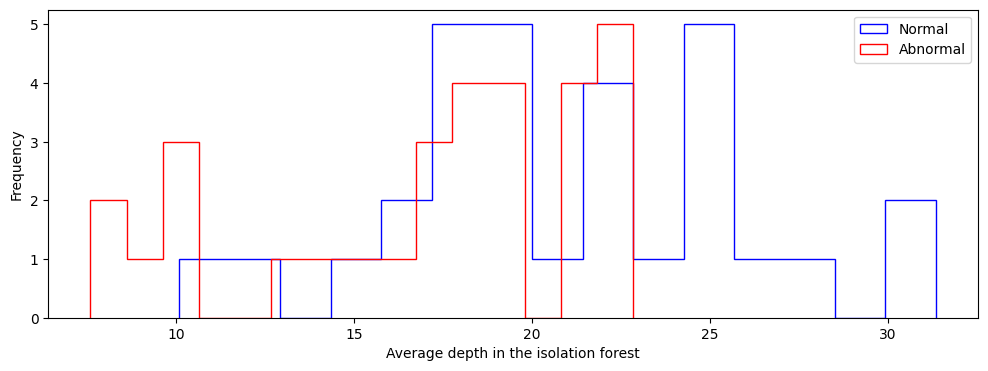

In [ ]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

- **Normal cases (blue):** They are more concentrated in the higher average depth range (around 20–25), with very few extending beyond 25 or below 10.
- **Abnormal cases (red):** These tend to have lower average depths, clustering mostly in the range of 5–20, with fewer cases overlapping with normal cases around 20–25.

## 3.2. Compute outlier scores and conclude

In [ ]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [ ]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

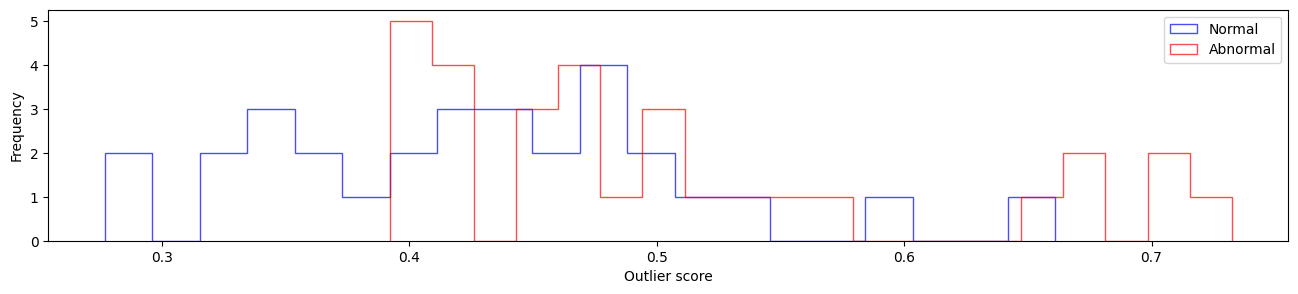

In [ ]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

- **Normal cases (blue):** These are mostly concentrated in the mid-range of outlier scores (around 0.4–0.5), with very few extending into higher or lower scores.
- **Abnormal cases (red):** These have a broader distribution, spreading more evenly across the range, including higher scores (above 0.6), which are less common for normal cases.

Abnormal cases tend to have higher outlier scores than normal ones, though there is some overlap in the 0.4–0.5 range. Higher outlier scores could be a strong indicator of abnormality.

<font size="+1" color="red">Replace this cell with your code to determine an optimal threshold.</font>

In [ ]:
def determine_optimal_threshold(normal_scores, abnormal_scores):
    # Combine all scores to get the range of possible threshold values
    all_scores = np.concatenate([normal_scores, abnormal_scores])

    # Sort the unique scores to use as potential thresholds
    sorted_scores = np.sort(np.unique(all_scores))
    best_threshold = None
    best_accuracy = 0

    # Perform linear search on each unique score as a potential threshold
    for threshold in sorted_scores:
        normal_classified_as_normal = sum(score <= threshold for score in normal_scores)
        abnormal_classified_as_abnormal = sum(score > threshold for score in abnormal_scores)

        accuracy = (normal_classified_as_normal + abnormal_classified_as_abnormal) / len(all_scores)

        # Update best threshold if the current accuracy is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    return best_threshold, best_accuracy

In [ ]:
(optimal_threshold, optimal_accuracy)=determine_optimal_threshold(normal_scores, abnormal_scores)
(optimal_threshold, optimal_accuracy)

(0.3756142599264367, 0.6666666666666666)

<font size="+1" color="red">Replace this cell with your evaluation of the optimal threshold.</font>

In [ ]:
def evaluate_threshold(normal_scores, abnormal_scores, threshold):
    # False Positives (normal exams classified as abnormal)
    false_positives = sum(score > threshold for score in normal_scores)

    # False Negatives (abnormal exams classified as normal)
    false_negatives = sum(score <= threshold for score in abnormal_scores)

    # Calculate False Positive Rate and False Negative Rate
    FPR = false_positives / len(normal_scores)
    FNR = false_negatives / len(abnormal_scores)

    return FPR, FNR

In [ ]:
FPR, FNR = evaluate_threshold(normal_scores, abnormal_scores, optimal_threshold)
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")

False Positive Rate (FPR): 0.67
False Negative Rate (FNR): 0.00


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>